# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

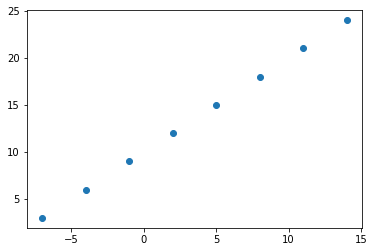

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y)

## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

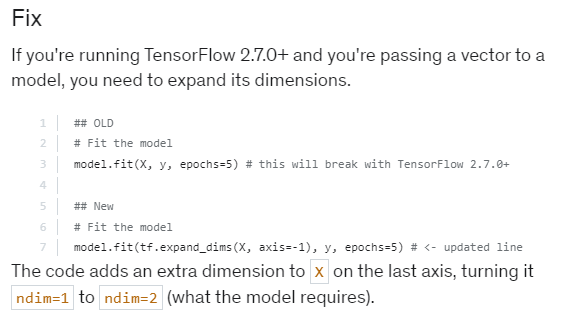

In [ ]:
# Turn our numpy arrays into tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling tensorflow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 518ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
 # Check out X and y
 X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred=model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred+10.9

array([[23.61602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the data more examples to learn from)

In [ ]:
# Let's recreate our model
tf.random.set_seed(42)
# 1. Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 574ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5043 - mae: 11.5043
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.5039 - mae: 11.5039
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.5034 - mae: 11.5034
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.5030 - mae: 11.5030
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5025 - mae: 11.5025
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 11.5021 - mae: 11.5021
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 11.5016 - mae: 11.5016
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 11.5012 - mae: 11.5012
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 11.5007 - mae: 11.5007
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

In [ ]:
# Let's see if our model prediction has improved...
model.predict([17.0])

array([[9.871047]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
              
# Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 769ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.2859 - mae: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6279 - mae: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9702 - mae: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.3044 - mae: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.6244 - mae: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.9248 - mae: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1949 - mae: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.4303 - mae: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 7.6245 - mae: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 28ms

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

array([[31.941307]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is: 

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak the model -> fit it ...
```  
When it comes to evaluation... there are 3 words you should memeorize:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The preditions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

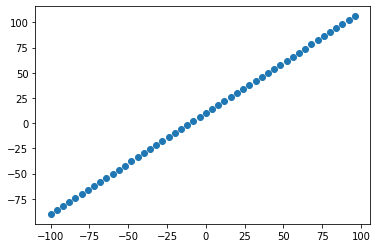

In [ ]:
# visualize the data
plt.scatter(X,y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have.
* **Validation set** - the model, gets tuned on this data, which is typically 10-15% of the data.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the data.


In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train=X[:40]
y_train=y[:40]

X_test=X[40:]
y_test=y[40:]

### Visualizing the data
Now we've got our data in training and test sets... let's visualizing it again!

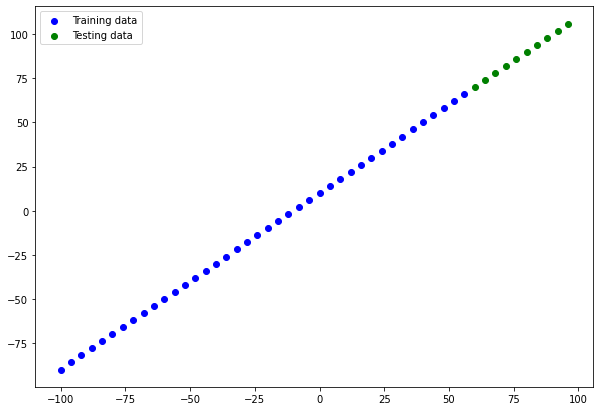

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="g",label="Testing data")
plt.legend(loc="upper left");

In [ ]:
# Let's have a look at how to build a neural network for our data
tf.random.set_seed(42)
# 1. Create a model
model=tf.keras.Sequential([
                          tf.keras.layers.Dense(1),

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create a model (same as above)
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
                           tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters during **transfer learning**)

📖**Resource:** For more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video (MIT 6.S191)

⚒**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of params (total and trainable) by calling `model.summary()`

💡**Inference:** After doing the exercise, we see that the params are twice in number of the neuron. This is because each neuron has a set of **weights** and **bias**

In [ ]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


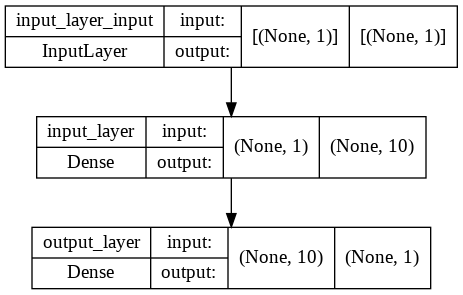

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred`

In [ ]:
# Make some predictions
y_pred=model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

🔑**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend();

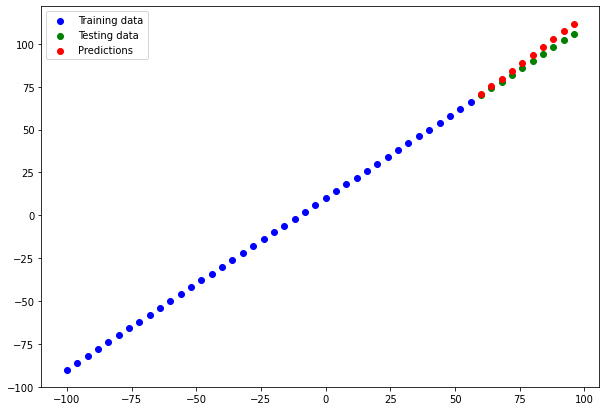

In [ ]:
plot_preds()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average how wrong is each of my model's predictions", `tf.keras.losses.MAE()` or `tf.metrics.mean_absolute_error()`.
* MSE - mean squared error, "square the average errors", `tf.keras.losses.MSE()` or `tf.metrics.mean_square_error()`.
* Huber - Combination of MSE and MAE. Less sensitive to outliers than MSE, `tf.keras.losses.Huber()`

In [ ]:
# Evaluate the model on a test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 140ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae.numpy()

3.1969407

In [ ]:
# Calculate the mean squared error
mse=tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse.numpy()

13.070143

In [ ]:
# Make some functions to get MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layers.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling expriments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, train for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1=tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 20ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 10ms/step 

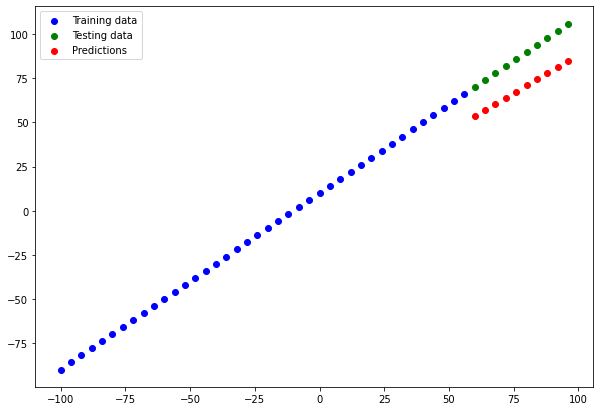

In [ ]:
# Make and plot for model_1
y_preds_1=model_1.predict(X_test)

plot_preds(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1.numpy(),mse_1.numpy()

(18.745327, 353.57336)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [ ]:
# Set the random seed
# tf.random.set_seed(42)

# 1. Create the model
model_2=tf.keras.Sequential([
                                    tf.keras.layers.Dense(50,activation="relu",name="input_layer"),
                                    tf.keras.layers.Dense(1,name="output_layer")
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 28.2838 - mae: 28.2838
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 14.7506 - mae: 14.7506
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 18.9153 - mae: 18.9153
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 14.5580 - mae: 14.5580
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 7.4082 - mae: 7.4082
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 8.6388 - mae: 8.6388
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.1651 - mae: 12.1651
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 7.1911 - mae: 7.1911
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 22.9874 - mae: 22.9874
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0372 - mae: 12.0372
Epoch 11/100
2/2 [==============================] - 0s 5ms/s

In [ ]:
y_pred_2=model_2.predict(X_test)
y_pred_2

array([[ 65.22141 ],
       [ 69.520874],
       [ 73.820335],
       [ 78.119804],
       [ 82.419266],
       [ 86.71873 ],
       [ 91.01819 ],
       [ 95.31766 ],
       [ 99.61713 ],
       [103.91658 ]], dtype=float32)

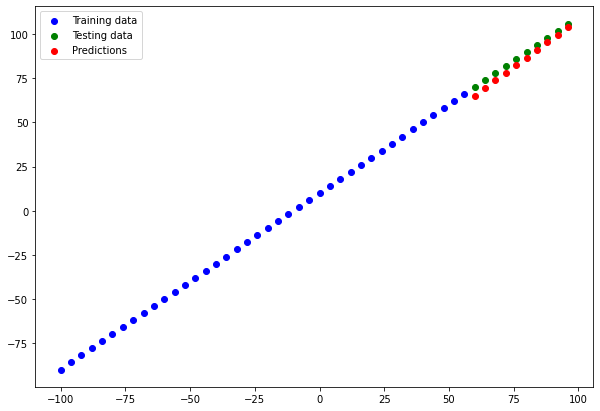

In [ ]:
plot_preds(predictions=y_pred_2)

In [ ]:
mae_2=mae(y_test,y_pred_2)
mse_2=mse(y_test,y_pred_2)
mae_2.numpy(),mse_2.numpy()

(3.4310029, 12.511627)

**Build `model_3`**
* 2 layers, 500 epochs

In [ ]:
# 1. Create the model
model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(50,activation="relu",name="input_layer"),
                             tf.keras.layers.Dense(1,name="output_layer")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 7ms/step - loss: 33.0330 - mae: 33.0330
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 21.2673 - mae: 21.2673
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 16.5888 - mae: 16.5888
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 5.4306 - mae: 5.4306
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 9.0332 - mae: 9.0332
Epoch 6/500
2/2 [==============================] - 0s 16ms/step - loss: 15.6606 - mae: 15.6606
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 12.4800 - mae: 12.4800
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 7.6230 - mae: 7.6230
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 22.4807 - mae: 22.4807
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 10.7984 - mae: 10.7984
Epoch 11/500
2/2 [==============================] - 0s 9ms/step 

In [ ]:
y_pred_3=model_3.predict(y_test)
y_pred_3

array([[ 81.81125],
       [ 86.2876 ],
       [ 90.76396],
       [ 95.24032],
       [ 99.71668],
       [104.19304],
       [108.6694 ],
       [113.14576],
       [117.62212],
       [122.09848]], dtype=float32)

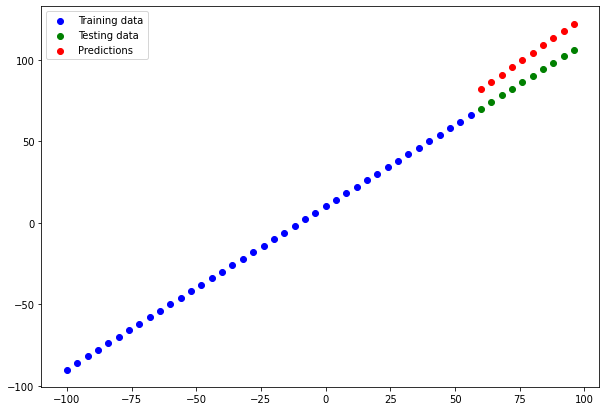

In [ ]:
plot_preds(predictions=y_pred_3)

In [ ]:
mae_3=mae(y_test,y_pred_3)
mse_3=mse(y_test,y_pred_3)
mae_3.numpy(),mse_3.numpy()

(13.954862, 196.61024)

🔑**Note:** You want to start with small experiments (models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
["model_2",mae_2.numpy(),mse_2.numpy()],
["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.431003,12.511627
2,model_3,13.954862,196.610245


Looks like `model_2` performed the best

In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


> 🔑**Note:** One of your main goals should be to minimize the time between your experiments. The more the experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment"

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.  
Luckily there are tools to help us!

📖**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the Tensorflow library to help track modelling experiments.
* Weights & Biases - a tools for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Colab (or wherever they were trained) such as in a web application or a mobile app.  
There are two main formats we can save our model's too:
1. The `SavedModel` format
1. The `HDF5` format

In [ ]:
# Save model using SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model (this is same for .h5 type)
loaded_SavedModel_format=tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds=model_2.predict(X_test)
loaded_SavedModel_format_preds=loaded_SavedModel_format.predict(X_test)

In [ ]:
mae(y_test,y_pred=model_2_preds),mae(y_test,y_pred=loaded_SavedModel_format_preds)

(<tf.Tensor: shape=(), dtype=float32, numpy=3.4310029>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.4310029>)

## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head(),insurance_one_hot.shape

(   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
 0   19  27.900         0  16884.92400           1         0          0   
 1   18  33.770         1   1725.55230           0         1          1   
 2   28  33.000         3   4449.46200           0         1          1   
 3   33  22.705         0  21984.47061           0         1          1   
 4   32  28.880         0   3866.85520           0         1          1   
 
    smoker_yes  region_northeast  region_northwest  region_southeast  \
 0           1                 0                 0                 0   
 1           0                 0                 0                 1   
 2           0                 0                 0                 1   
 3           0                 0                 1                 0   
 4           0                 0                 1                 0   
 
    region_southwest  
 0                 1  
 1                 0  
 2                 0  
 3                 0  

In [ ]:
# Create X and y (features and labels)
X,y=insurance_one_hot.drop("charges",axis=1),insurance_one_hot["charges"]

In [ ]:
# Create a training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model=tf.keras.Sequential([
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
1. Train for longer
1. Change model **hyperparamters** such as `lr`,`units`,`activation` etc.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2=tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3=tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

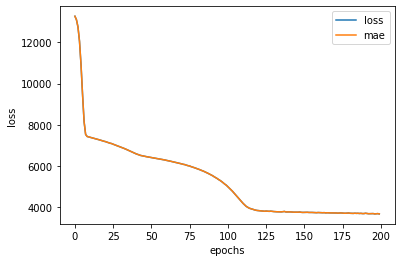

In [ ]:
# Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔**Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so Tensorflow has a solution! It's called the [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a Tensorflow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural netwroks tend to prefer normalization.

If you're not sure on which one to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


T prepare our data we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

# Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # Turn all values into same scale
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X and y
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

# Build our train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with column transformers (ROBOTS IN DISGUISE!)
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4=tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11925.96

In [ ]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]